In [1]:
from utilities import input_tools,boostHistHelpers as hh
from wremnants import plot_tools,theory_tools,syst_tools
import lz4.frame,pickle
import hist
import numpy as np
import uproot

Welcome to JupyROOT 6.26/06


2023-02-20 14:11:21.520245: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-20 14:11:21.829947: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /.singularity.d/libs
2023-02-20 14:11:21.829991: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-20 14:11:21.858909: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-20 14:11:22.673291: W

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
with lz4.frame.open("/scratch/kelong/Analysis/MuonCorrCompare/mz_wlike_with_mu_eta_pt_scetlibNPCorr_massfit_lbl_dilepton.pkl.lz4") as f:
    res = pickle.load(f)

In [4]:
nominal = res["ZmumuPostVFP"]["output"]["dilepton_scetlibNPCorr_unc"]

In [5]:
names = [x.replace("Up", "") if "Up" in x else "" for x in syst_tools.scetlib_np_vars()]

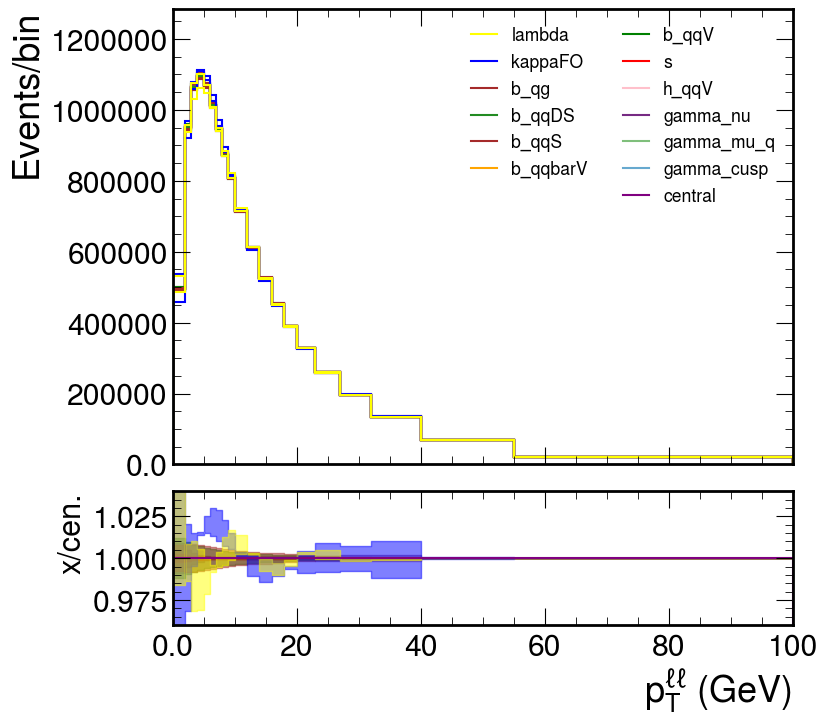

In [6]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                nominal[{"vars" : i}].project("ptll") for i in nominal.axes[-1]
            ],
            labels=["central"]+names,
    colors=["purple"]+[
                    "#67a9cf", "#67a9cf",
                    "#7fbf7b", "#7fbf7b",
                    "#762a83", "#762a83", 
                    "pink", "pink",
                    "red", "red",
                    "green", "green",
                    "orange", "orange",
                    "brown","brown",
                    "forestgreen", "forestgreen",
                    "brown", "brown",
                    "blue","blue",
                    "yellow", "yellow"
                   ],
            xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/cen.",
            rrange=[0.96, 1.04],
            yscale=1.1,
            legtext_size=18,
            xlim=None, binwnorm=1.0, baseline=True, 
            fill_between=True,
)

In [7]:
combinef = uproot.open("/scratch/kelong/CombineStudies/ptll_scetlibNP/ZMassWLike/fitresults_123456789.root")

In [8]:
combinef_scale = uproot.open("/scratch/kelong/CombineStudies/ptll_scetlibScale/ZMassWLike/fitresults_123456789.root")

In [9]:
combine_input = uproot.open("/scratch/kelong/CombineStudies/ptll_scetlibNP/ZMassWLike/ZMassWLikeCombineInput.root")

In [10]:
pseudodata = combine_input["x_Zmumu_combined"].to_hist()

In [11]:
prefit = combine_input["x_Zmumu_combined"].to_hist()
postfit = prefit.copy()
postfit_scale = prefit.copy()

In [12]:
pseudodata.values(flow=True)[...] = combinef["obs"].to_hist().values(flow=True)

In [19]:
combinef["obs"].to_hist()

Hist(Regular(18, -0.5, 17.5, name='xaxis'), storage=Double()) # Sum: 7313723.784772716

In [13]:
postfit.values()[...] = combinef["expproc_Zmumu_postfit"].to_hist().values()
postfit_scale.values()[...] = combinef_scale["expproc_Zmumu_postfit"].to_hist().values()

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7fad9cb3b430>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

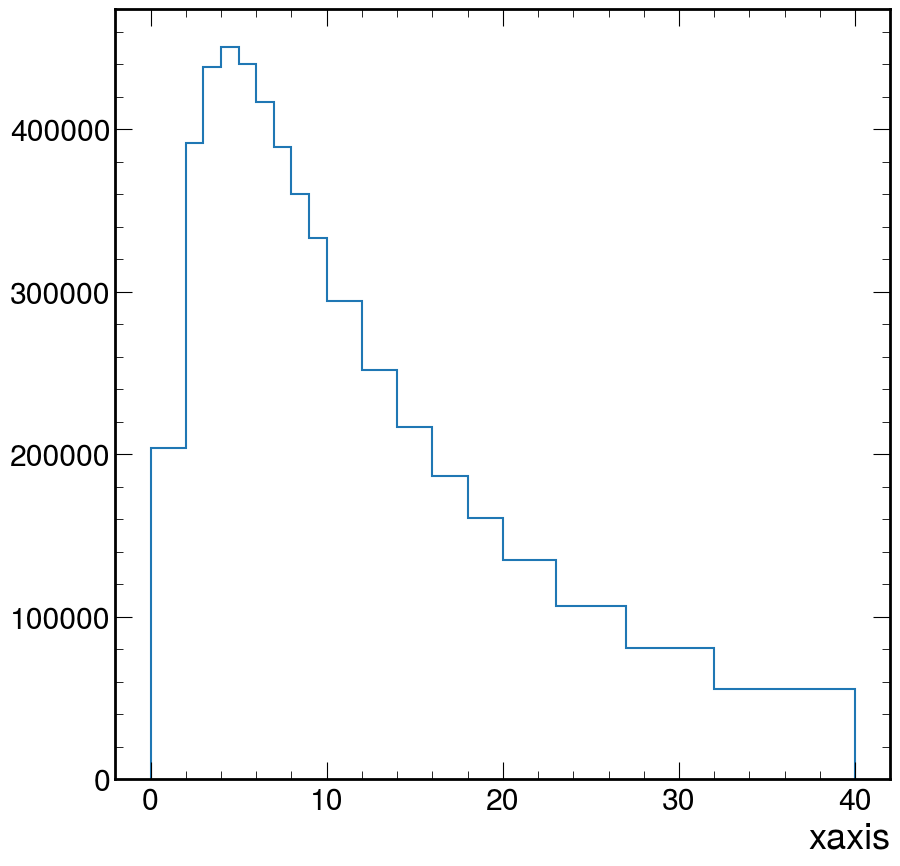

In [14]:
prefit.plot(binwnorm=1.)

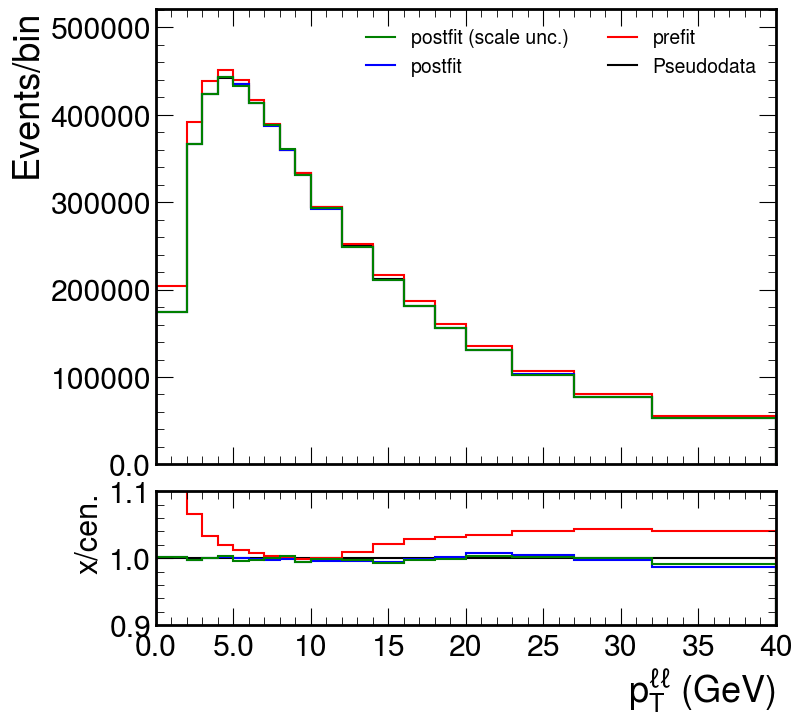

In [15]:
fig = plot_tools.makePlotWithRatioToRef(
            [
                pseudodata, prefit, postfit, postfit_scale
            ],
            labels=["Pseudodata", "prefit", "postfit", "postfit (scale unc.)", ],
            colors=["black", "red", "blue", "green"],
            xlabel="p$_{T}^{\ell\ell}$ (GeV)", 
            ylabel="Events/bin",
            rlabel="x/cen.",
            rrange=[0.9, 1.1],
            yscale=1.1,
            xlim=None, binwnorm=1.0, baseline=True, 
)

In [16]:
with lz4.frame.open("/scratch/kelong/Analysis/MuonBias/mz_wlike_with_mu_eta_pt_massfit.pkl.lz4") as f:
    res = pickle.load(f)

In [17]:
[x for x in res["ZmumuPostVFP"]["output"] if "qcdScale"  in x]

['nominal_qcdScale', 'nominal_qcdScaleByHelicity']